# LaLonde Dataset

Economists have long-hypothesized that training programs could improve the labor market prospects of participants.
In an attempt to test (or demonstrate) this, the National Supported Work (NSW) Demonstration was initiated using combined private and federal funding. This program was implemented between 1975 and 1979 in 15 locations across the US.
The program provided 6-18 month training for individuals who had faced economic and social problems (such as women receiving Aid to Families with Dependent Children, former drug addicts, ex-convicts, and former juvenile delinquents, etc.).

Participants were randomly assigned into experimental group (Support Work Programs) and control groups.
However, due to the long duration of the study, participants joining the program at the beginning had different characteristics than people joining later.  
Therefore, this covariate shift should be adjusted for in order to estimate the true causal effect of the job-program on future employment.

Furthermore, we add some observational data that was obtained from the Population Survey of Income Dynamics and the Current Population Survey. These did not receive any training and are considered controls.

This dataset had become a common benchmark for causal analysis over the years.
Original analysis of the study was done by [Robert LaLonde](https://en.wikipedia.org/wiki/Robert_LaLonde) and published in his 1986 [Evaluating the Econometric Evaluations of Training Programs with Experimental Data](http://people.hbs.edu/nashraf/LaLonde_1986.pdf) paper.  
The analysis here is based on results from a later, propensity-based, analysis made by Dehejia and Wahba in their 1999 [Causal Effects in Non-Experimental Studies: Reevaluating the Evaluation of Training Programs](https://users.nber.org/~rdehejia/papers/dehejia_wahba_jasa.pdf).

We follow the procedure described in the LaLonde example to load the data.

## The Data
First, let's download the dataset from [Rajeev Dehejia's webpage](https://users.nber.org/~rdehejia/nswdata2.html).

In [1]:
import pandas as pd

columns = ["training",   # Treatment assignment indicator
           "age",        # Age of participant
           "education",  # Years of education
           "black",      # Indicate whether individual is black
           "hispanic",   # Indicate whether individual is hispanic
           "married",    # Indicate whether individual is married
           "no_degree",  # Indicate if individual has no high-school diploma
           "re74",       # Real earnings in 1974, prior to study participation
           "re75",       # Real earnings in 1975, prior to study participation
           "re78"]       # Real earnings in 1978, after study end

# treated = pd.read_csv("http://www.nber.org/~rdehejia/data/nswre74_treated.txt",
#                      delim_whitespace=True, header=None, names=columns)
# control = pd.read_csv("http://www.nber.org/~rdehejia/data/nswre74_control.txt",
#                      delim_whitespace=True, header=None, names=columns)
file_names = ["http://www.nber.org/~rdehejia/data/nswre74_treated.txt",
              "http://www.nber.org/~rdehejia/data/nswre74_control.txt",
              "http://www.nber.org/~rdehejia/data/psid_controls.txt",
              "http://www.nber.org/~rdehejia/data/psid2_controls.txt",
              "http://www.nber.org/~rdehejia/data/psid3_controls.txt",
              "http://www.nber.org/~rdehejia/data/cps_controls.txt",
              "http://www.nber.org/~rdehejia/data/cps2_controls.txt",
              "http://www.nber.org/~rdehejia/data/cps3_controls.txt"]
files = [pd.read_csv(file_name, delim_whitespace=True,
                     header=None, names=columns) for file_name in file_names]
lalonde = pd.concat(files, ignore_index=True)
lalonde = lalonde.sample(frac=1.0, random_state=42)  # Shuffle

print(lalonde.shape)
lalonde.head()

(22106, 10)


,training,age,education,black,hispanic,married,no_degree,re74,re75,re78
16827,0.0,26.0,13.0,0.0,0.0,0.0,0.0,58.778,50.12903,31.03226
5412,0.0,27.0,12.0,0.0,0.0,1.0,0.0,16297.180,13429.21000,19562.14000
15399,0.0,26.0,12.0,0.0,0.0,0.0,0.0,5217.527,3174.24200,25564.67000
13077,0.0,38.0,16.0,0.0,0.0,1.0,0.0,23713.010,9178.98400,18814.41000
2189,0.0,55.0,8.0,0.0,0.0,1.0,1.0,0.000,0.00000,0.00000


In [2]:
print(f'The dataset contains {lalonde.shape[0]} people, out of which {lalonde["training"].sum():.0f} received training')

The dataset contains 22106 people, out of which 185 received training


### Design matrix
#### Earning indications
Following the analysis performed by Gelman et al. on their [arm](https://cran.r-project.org/web/packages/arm/index.html) R library, we will create two indicator variables indicating no earnings in 1974 and 1975.

In [3]:
lalonde = lalonde.join((lalonde[["re74", "re75"]] == 0).astype(int), rsuffix=("=0"))
lalonde.head()

,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
16827,0.0,26.0,13.0,0.0,0.0,0.0,0.0,58.778,50.12903,31.03226,0,0
5412,0.0,27.0,12.0,0.0,0.0,1.0,0.0,16297.180,13429.21000,19562.14000,0,0
15399,0.0,26.0,12.0,0.0,0.0,0.0,0.0,5217.527,3174.24200,25564.67000,0,0
13077,0.0,38.0,16.0,0.0,0.0,1.0,0.0,23713.010,9178.98400,18814.41000,0,0
2189,0.0,55.0,8.0,0.0,0.0,1.0,1.0,0.000,0.00000,0.00000,1,1


In [4]:
print(lalonde.shape)
lalonde.head()

(22106, 12)


,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
16827,0.0,26.0,13.0,0.0,0.0,0.0,0.0,58.778,50.12903,31.03226,0,0
5412,0.0,27.0,12.0,0.0,0.0,1.0,0.0,16297.180,13429.21000,19562.14000,0,0
15399,0.0,26.0,12.0,0.0,0.0,0.0,0.0,5217.527,3174.24200,25564.67000,0,0
13077,0.0,38.0,16.0,0.0,0.0,1.0,0.0,23713.010,9178.98400,18814.41000,0,0
2189,0.0,55.0,8.0,0.0,0.0,1.0,1.0,0.000,0.00000,0.00000,1,1


### Variables selection
Lastly, we extract the covariates, treatment and outcome variables

In [5]:
a = lalonde.pop("training")
y = lalonde.pop("re78")
X = lalonde
X.shape, a.shape, y.shape

((22106, 10), (22106,), (22106,))

## Using Matching to Estimate the Outcome and to Prepare the Data for IPW
We have some concerns here that the data may be too imbalanced between treatment and control to allow a reliable inference. Even though propensity weighting can, in principle, correct for covariate imbalances, we see here that this data has some pretty severe positivity violations. When we condition the data by matching it before using inverse propensity weighting, we find that the IPW is more effective as judged by the weighted covariate imbalance. Most interestingly, we see that the sign of the effect changes once the covariates are balanced.

We'll start by looking at the results of a simple matching on propensity with one neighbor and with replacement. We use the `PropensityTransformer` object to calculate the propensity and add it to the covariates to be used for matching.

In [6]:
from causallib.estimation import IPW, Matching
from causallib.preprocessing.transformers import PropensityTransformer
from sklearn.linear_model import LogisticRegression
import pandas as pd


def learner(): return LogisticRegression(solver="liblinear",
                                         max_iter=5000,
                                         class_weight="balanced")

As we show in the Faiss notebook, matching is much faster using the faiss backend. This requires `faiss-gpu` or `faiss-cpu` to be installed. We will automatically select it if it is available, falling back on "sklearn" if not.

In [7]:
try:
    from causallib.contrib.faissknn import FaissNearestNeighbors
    knn_backend = FaissNearestNeighbors
except ImportError:
    knn_backend = "sklearn"

In [8]:
propensity_transform = PropensityTransformer(
    include_covariates=False, learner=learner())
matcher = Matching(propensity_transform=propensity_transform,
                   with_replacement=True, n_neighbors=1, knn_backend=knn_backend)
matcher.fit(X, a, y)
matcher.match(X, a)

distances  matches
match_to_treatment sample_id                        
0.0                16827                [0]  [16827]
                   5412                 [0]   [5412]
                   15399                [0]  [15399]
                   13077                [0]  [13077]
                   2189                 [0]   [2189]
...                                     ...      ...
1.0                11964      [0.029483559]    [178]
                   21575              [0.0]     [30]
                   5390        [0.01956479]    [171]
                   860        [0.058751065]    [178]
                   15795      [0.005777422]     [41]

[44212 rows x 2 columns]

One way to understand better how close our samples our is to examine the covariates for the matches that we have discovered. We can do that with the `get_covariates_of_matches` function.

In [9]:
best_control_matches = matcher.get_covariates_of_matches(1, 0, X)
best_treatment_matches = matcher.get_covariates_of_matches(0, 1, X)

We can view the worst matches and see which covariates are not matched. The `get_covariates_of_matches` DataFrame includes the covariates of the matches, and details on the matches. We will focus here on the `"delta"` columns:

In [10]:
best_control_matches.sort_values(("match", "distance"), ascending=False)["delta"].head(10)

,age,education,black,hispanic,married,no_degree,re74,re75,re74=0,re75=0
2274,23.0,0.0,0.0,0.0,1.0,0.0,130388.686,148197.726,0.0,0.0
18914,33.0,5.0,0.0,0.0,1.0,0.0,81407.012,90012.238,0.0,0.0
12877,27.0,4.0,0.0,0.0,1.0,0.0,87284.813,90012.238,0.0,0.0
3310,20.0,4.0,0.0,0.0,1.0,0.0,97081.146,84641.270,0.0,0.0
253,15.0,5.0,0.0,0.0,1.0,0.0,75529.212,76584.819,0.0,0.0
17098,6.0,4.0,0.0,0.0,1.0,0.0,91203.346,81060.625,0.0,0.0
4605,25.0,4.0,0.0,0.0,1.0,0.0,71610.678,70318.690,0.0,0.0
11638,33.0,4.0,0.0,0.0,1.0,0.0,42221.676,63157.399,0.0,0.0
6670,11.0,4.0,0.0,1.0,1.0,0.0,28506.808,77479.980,0.0,0.0
21105,16.0,1.0,0.0,0.0,1.0,0.0,44180.943,64947.722,0.0,0.0


We see pretty bad matching on income in 1974 and 1975 ("re74" and "re75") as well as age, even as the other covariates seem pretty well matched. We can do the same thing looking at the best matches each treatment sample found. We find much better agreement, both in terms of propensity scores distances and in terms of the covariates. Here, the income delta is about an order of magnitude smaller than we find in the other direction.

In [11]:
best_treatment_matches.sort_values(("match", "distance"), ascending=False)["delta"].head(10)

,age,education,black,hispanic,married,no_degree,re74,re75,re74=0,re75=0
142,23.0,-4.0,1.0,-1.0,-1.0,1.0,3165.6580,2378.0940,-1.0,0.0
93,8.0,1.0,0.0,0.0,1.0,-1.0,-11917.0550,-10407.8857,0.0,0.0
103,30.0,4.0,0.0,0.0,0.0,-1.0,-2870.3260,-785.9516,1.0,1.0
115,0.0,2.0,0.0,0.0,0.0,0.0,-4829.4348,-3580.6452,0.0,1.0
130,8.0,-1.0,0.0,0.0,0.0,1.0,-2849.6230,-1241.8860,0.0,0.0
127,21.0,-1.0,0.0,0.0,0.0,1.0,0.0000,-6640.3060,0.0,1.0
184,5.0,-10.0,0.0,0.0,0.0,1.0,4552.0330,3405.5497,0.0,0.0
11,29.0,-8.0,0.0,0.0,0.0,1.0,0.0000,-6640.3060,0.0,1.0
76,-9.0,-2.0,0.0,0.0,0.0,1.0,-2163.3790,3800.9480,0.0,0.0
83,2.0,-2.0,0.0,0.0,0.0,1.0,-4392.7160,583.5100,0.0,0.0


This tells us that for every treated individual (ie, an individual who received employment training) there is an untreated individual that is fairly similar, but there are a great many control individuals who have covariates, particularly income levels, that are vastly different from their nearest match in the treated group.

We can pursue this observation further by examining the distribution of propensity distances for matching control samples and matching treatment samples.

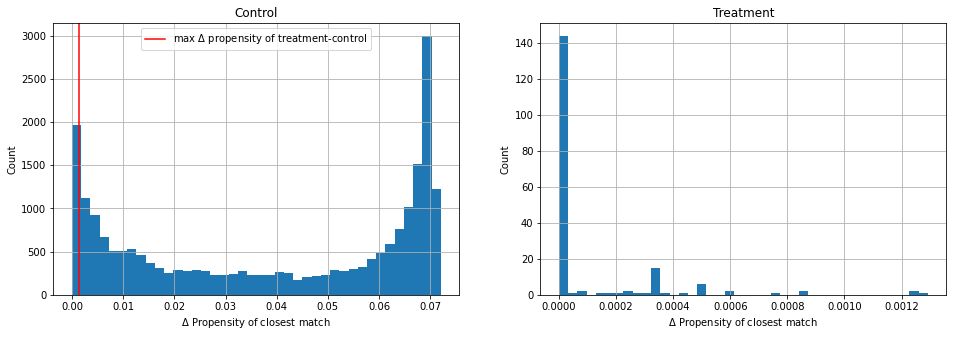

In [12]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(16, 5))
best_control_matches.match.distance.hist(ax=axes[0], bins=40)
best_treatment_matches.match.distance.hist(ax=axes[1], bins=40)
axes[0].set_xlabel("$\Delta$ Propensity of closest match")
axes[1].set_xlabel("$\Delta$ Propensity of closest match")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("Count")
axes[0].set_title("Control")
axes[1].set_title("Treatment")
axes[0].axvline(x=best_treatment_matches.match.distance.max(
), color="red", label="max $\Delta$ propensity of treatment-control")
axes[0].legend();

Wow! The largest distance of a nearest neighbor that we find when searching for neighbors of the treated is in the first couple percentiles of distances of nearest neighbors when searching from control to treated. Actually it's just inside the 6th percentile:

In [13]:
sum((best_control_matches.match.distance <=
     best_treatment_matches.match.distance.max())) / len(best_control_matches)

0.07171205693170932

How can matching help us in this case? For one we can do a simple, no replacement match and compare the `n_treated` pairs to estimate the outcome:

In [14]:
matcher.with_replacement = False
matcher.match(X, a)
matcher.estimate_population_outcome(X, a)

0.0    5093.492942
1.0    6349.143530
dtype: float64

That gives us an effect of $1752 for those who received the treatment. That's pretty dramatic and totally different from the naive estimate, which was negative. But we are only using 370 samples out of the original dataset of ~21,000. It would be nice to utilize more of the data that we have. One thing we can do is utilize a caliper and use matching to estimate the potential outcomes:

In [15]:
import numpy as np
matcher.n_neighbors = 3
results, sample_count = [[], []]
cvec = np.logspace(-7, -0.5, 10)
for caliper in cvec:
    matcher.caliper = caliper
    matcher.with_replacement = True
    matcher.match(X, a)
    results.append(matcher.estimate_population_outcome(X, a))
    sample_count.append(matcher.samples_used_)
cresults = pd.DataFrame(data=results, index=cvec)

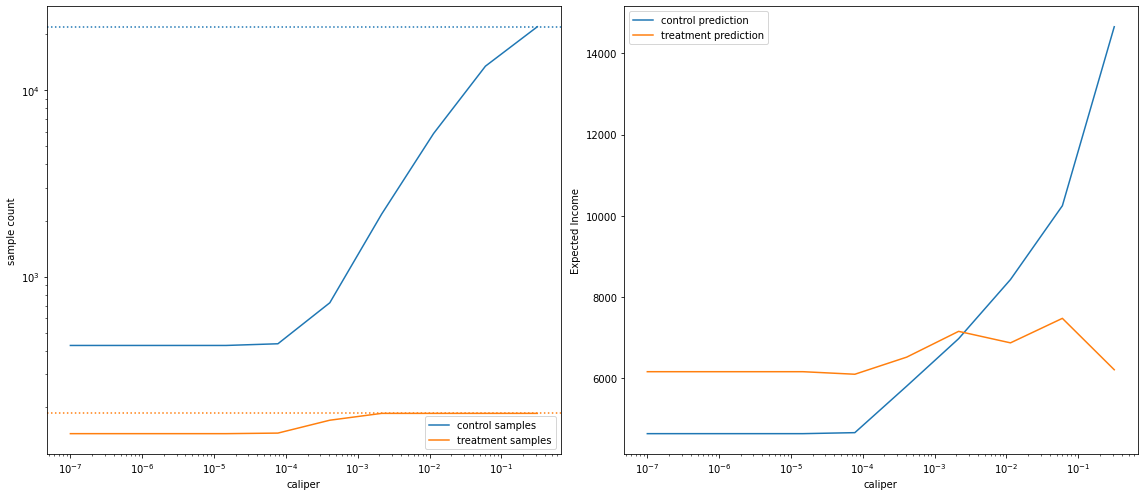

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].loglog(cvec, sample_count)
axes[0].legend(["control samples", "treatment samples"])
axes[0].axhline(y=sum(a == 0), ls=":", color="C0")
axes[0].axhline(y=sum(a == 1), ls=":", color="C1")
axes[0].set_xlabel("caliper")
axes[0].set_ylabel("sample count")
axes[0].axis("tight")

axes[1].semilogx(cvec, results)
axes[1].legend(["control prediction", "treatment prediction"])
axes[1].set_xlabel("caliper")
axes[1].set_ylabel("Expected Income")

plt.tight_layout();

That's pretty interesting. We see that in this way we can use a sliding scale of how strict we want to be on the matching and we see a dramatic shift in the effect estimation as we include the distant matches, namely the effect changes signs!

What about inverse propensity weighting? Propensity is a balancing weight, so as long as we clean up the positivity problems, we should be able to get a pretty robust estimate in this way. We can even keep tabs on the covariate balancing to see how well we are doing at correcting positivity problems. Because if there are positivity problems the covariates will not be balancable by the inverse propensity weights. To give the IPW model more to work with, we can expand to three neighbors (caliper permitting).

In [17]:
from causallib.preprocessing.transformers import MatchingTransformer
from causallib.evaluation.metrics import calculate_covariate_balance
caliper_vec = np.logspace(-5.5, -1, 10)
covbal = []
n_neighbors = 3


def match_then_ipw_weight(caliper):
    mt = MatchingTransformer(
        propensity_transform=PropensityTransformer(
            include_covariates=False, learner=learner()),
        caliper=caliper,
        n_neighbors=n_neighbors)
    mt.fit(X, a, y)
    Xm, am, ym = mt.transform(X, a, y)
    ipw = IPW(learner=learner())
    ipw.fit(Xm, am,)
    ipw_weights = ipw.compute_weights(Xm, am)
    ipw_outcome = ipw.estimate_population_outcome(Xm, am, ym)
    matched_treated = sum(am == 1)
    matched_control = sum(am == 0)
    covbalance = calculate_covariate_balance(Xm, am, ipw_weights)
    return {"caliper": caliper, "n_treated": matched_treated, "n_control": matched_control,
            "ipw_weights": ipw_weights, "ipw_outcome": ipw_outcome,
            "covariate_balance": covbalance.drop(columns="unweighted")}


results = [match_then_ipw_weight(c) for c in caliper_vec]

covbal_df = pd.concat([i["covariate_balance"] for i in results], axis=1)

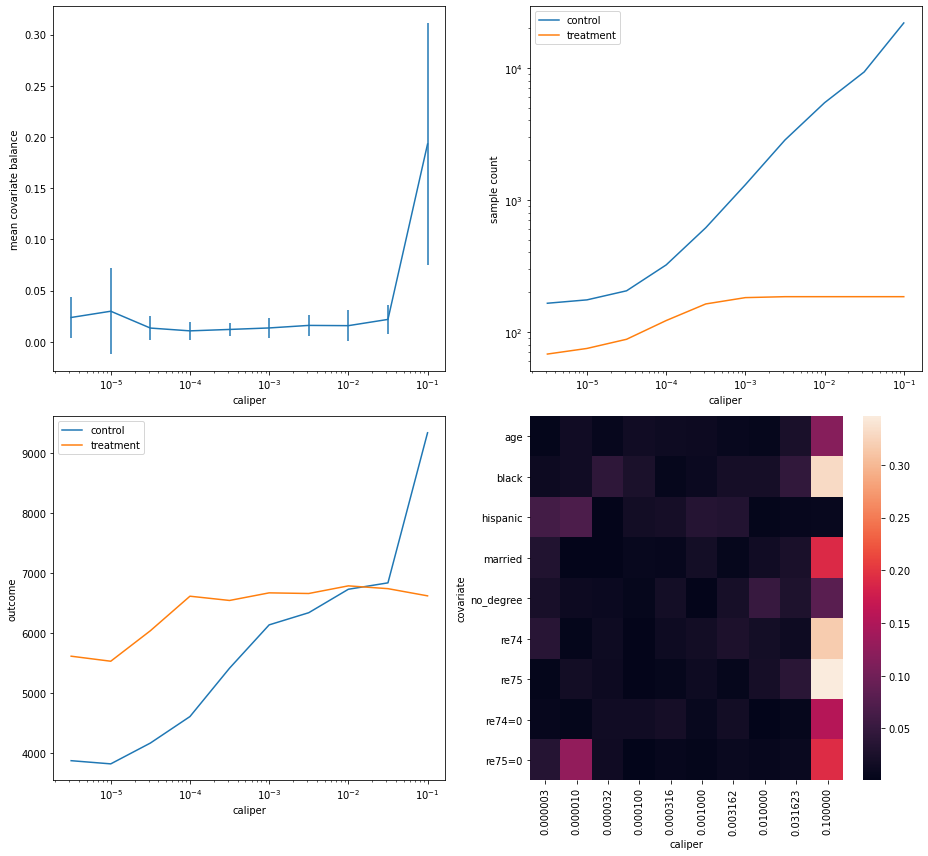

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
covbal_df.columns = ["%.6f" % i for i in caliper_vec]
covbal_noedu_df = covbal_df.drop(
    labels=[i for i in covbal_df.index if "education" in i])
f, ax = plt.subplots(2, 2, figsize=(13, 12))

ax[0, 0].errorbar(caliper_vec, covbal_noedu_df.mean(), yerr=covbal_noedu_df.std())
ax[0, 0].set_xscale("log")
ax[0, 0].set_xlabel("caliper")
ax[0, 0].set_ylabel("mean covariate balance")

ax[0, 1].semilogx(caliper_vec, [i["n_control"] for i in results], label="control")
ax[0, 1].semilogx(caliper_vec, [i["n_treated"] for i in results], label="treatment")
ax[0, 1].set_ylabel("sample count")
ax[0, 1].set_xlabel("caliper")
ax[0, 1].set_xscale("log")
ax[0, 1].set_yscale("log")
ax[0, 1].legend()

ax[1, 0].semilogx(caliper_vec, [i["ipw_outcome"][0] for i in results], label="control")
ax[1, 0].semilogx(caliper_vec, [i["ipw_outcome"][1] for i in results], label="treatment")
ax[1, 0].set_ylabel("outcome")
ax[1, 0].set_xlabel("caliper")
ax[1, 0].set_xscale("log")
ax[1, 0].legend()

sb.heatmap(data=covbal_noedu_df, ax=ax[1, 1])
ax[1, 1].set_xlabel("caliper")

plt.tight_layout();

## Conclusion

We see that the prediction remains fairly robust as we expand the data to include non-exact matches, up to a point. With no data filtering, the IPW gets tripped up on the positivity violations and does not successfully balance the covariates, especially previous income (and hispanic).

Thus, despite its power, the IPW method cannot on its own detect positivity violations and can be improved by filtering using matching or a similar procedure.
